In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import c, sigma_sb, R_sun

In [2]:
data = pd.read_excel('e490_00a_amo.xls')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,"Wavelength, microns",E-490 W/m2/micron,"Wavelength, nm","Wavelength, µm","Wehrli, W/m2/µm","Wehrli, W/m2/nm"
0,0.1195,6.190000e-02,199.5,0.1995,5.0,0.005
1,0.1205,5.614000e-01,200.5,0.2005,7.0,0.007
2,0.1215,4.901000e+00,201.5,0.2015,7.0,0.007
3,0.1225,1.184000e+00,202.5,0.2025,8.0,0.008
4,0.1235,4.770000e-02,203.5,0.2035,9.0,0.009
...,...,...,...,...,...,...
1692,200.0000,1.530000e-06,NaN,NaN,NaN,NaN
1693,250.0000,6.280000e-07,NaN,NaN,NaN,NaN
1694,300.0000,2.950000e-07,NaN,NaN,NaN,NaN
1695,400.0000,1.010000e-07,NaN,NaN,NaN,NaN


In [3]:
W_wavelength_microns = data['Wavelength, µm']
W_flux_microns = data['Wehrli, W/m2/µm']
# Quitar los valores de nan
W_wavelength_microns = W_wavelength_microns.dropna()
W_flux_microns = W_flux_microns.dropna()

#Convert wavelength to angstroms
W_wavelength_angstroms = (np.array(W_wavelength_microns)*u.micron).to(u.angstrom)
# Convert flux to ergs/s/cm^2/Angstrom
W_flux_ergs = (np.array(W_flux_microns)*(u.watt / u.m**2 / u.micron)).to(u.erg / u.s / u.cm**2 / u.angstrom)

#E_wavelength_microns = data['Wavelength, microns']
#E_flux_microns = data['E-490 W/m2/micron']

#Convert wavelength to angstroms
#E_wavelength_angstroms = (np.array(E_wavelength_microns)*u.micron).to(u.angstrom)
# Convert flux to ergs/s/cm^2/Angstrom
#E_flux_ergs = (np.array(E_flux_microns)*(u.watt / u.m**2 / u.micron)).to(u.erg / u.s / u.cm**2 / u.angstrom)

In [4]:
F_v = (W_flux_ergs*W_wavelength_angstroms**2/c).to(u.erg / u.s / u.cm**2 / u.Hz)

In [5]:
# Suaviza el espectro utilizando astropy.convolution.convolve
from astropy.convolution import convolve, Gaussian1DKernel

# Define the kernel
kernel = Gaussian1DKernel(stddev=13)
z = convolve(W_flux_ergs, kernel)

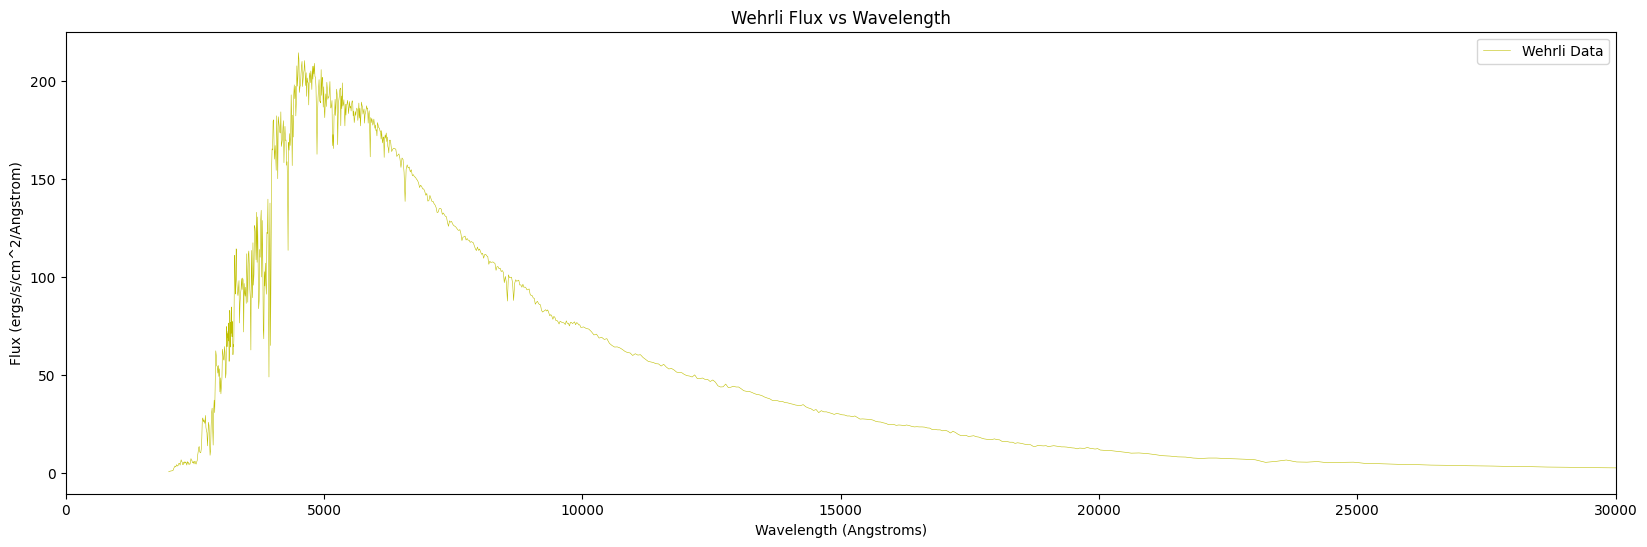

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(W_wavelength_angstroms, W_flux_ergs, linewidth=0.4, color='y', label='Wehrli Data')
#ax.plot(W_wavelength_angstroms, F_v*10**11.09, linewidth=0.4, color='r', label='Wehrli Flux')
#ax.plot(W_wavelength_angstroms, z, linewidth=1, color='g', label='Wehrli Smooth')
#ax.plot(E_wavelength_angstroms, E_flux_ergs, linewidth=0.4, color='blue', label='E-490 Data')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Flux (ergs/s/cm^2/Angstrom)')
ax.set_title('Wehrli Flux vs Wavelength')
ax.set_xlim(0, 30000)
ax.legend()
plt.show()


In [7]:
integral_flux = 0

for i in range(len(W_wavelength_angstroms)-1):
    integral_flux += (W_wavelength_angstroms[i+1]-W_wavelength_angstroms[i])*(W_flux_ergs[i]+W_flux_ergs[i+1])/2
    
print('Integral de flujo:', integral_flux)


Integral de flujo: 1365235.45 erg / (cm2 s)


In [8]:
Lum = 4*np.pi*(R_sun**2)*integral_flux

In [9]:
dist = (1*u.ua)**2
superficie_sol_2d = np.pi*(R_sun**2)
I_v_list = F_v*superficie_sol_2d/dist

In [10]:
I_v = 0
for i in range(len(W_wavelength_angstroms)-1):
    I_v += (W_wavelength_angstroms[i+1]-W_wavelength_angstroms[i])*(I_v_list[i]+I_v_list[i+1])/2

print('Intensidad específica solar:', I_v)

Intensidad específica solar: 94611663751203.67 Angstrom erg m2 / (cm2 Hz s ua2)


In [11]:
cte = Lum/(4*np.pi*R_sun**2)
cte_sun = cte.to(u.Watt/u.m**2)
cte_sun

<Quantity 1365.23545 W / m2>